# Housing Dataset


In [54]:
#import the labraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Load Dataset

In [2]:
df=pd.read_csv('Housing.csv')
df


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [3]:
df.head() # gives tthe first fives rows


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
df.tail() #gives the last 5 lines


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316
4999,65510.581804,5.992305,6.792336,4.07,46501.283803,1.298950e+06,"37778 George Ridges Apt. 509\nEast Holly, NV 2..."


In [5]:
df.shape

(5000, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [7]:
df1=df.drop(columns=['Address'])
df1

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


In [9]:
df1.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


# Check outliers

<Axes: ylabel='Avg. Area Income'>

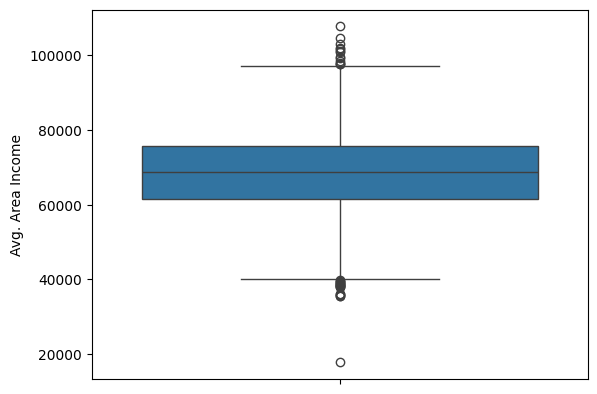

In [25]:
sns.boxplot(df1['Avg. Area Income'])

In [26]:
#  we can handle the outliers by IQR method
Q1 = df1['Avg. Area Income'].quantile(0.25)
Q3 = df1['Avg. Area Income'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print("Lower Limit:", lower_limit)
print("Upper Limit:", upper_limit)

# Cap outliers (recommended)
df1['Avg. Area Income'] = np.where(df1['Avg. Area Income'] < lower_limit, lower_limit,
                                  np.where(df1['Avg. Area Income'] > upper_limit, upper_limit, df1['Avg. Area Income']))


Lower Limit: 40026.39797192346
Upper Limit: 97237.50308269015


<Axes: ylabel='Avg. Area Income'>

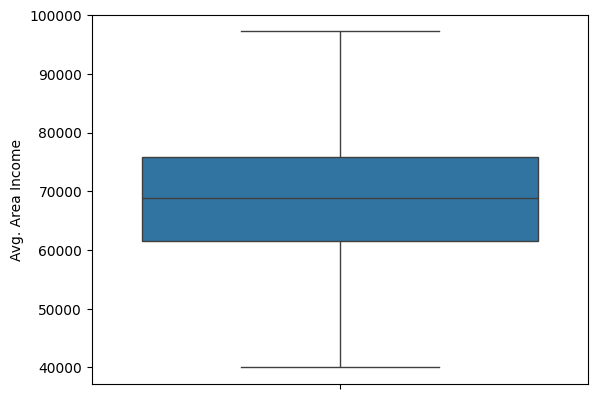

In [27]:
sns.boxplot(df1['Avg. Area Income'])

<Axes: ylabel='Avg. Area House Age'>

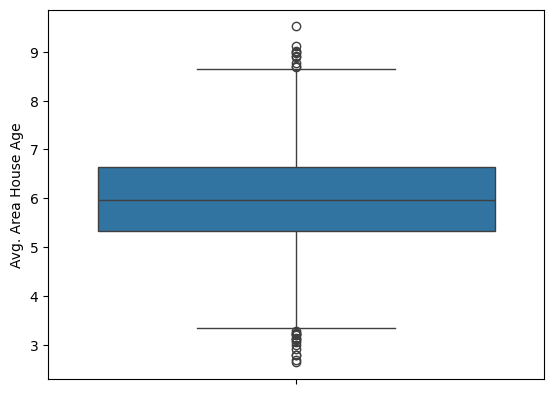

In [28]:
sns.boxplot(df1['Avg. Area House Age'])

In [29]:
#  we can handle the outliers by IQR method
Q1 = df1['Avg. Area House Age'].quantile(0.25)
Q3 = df1['Avg. Area House Age'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print("Lower Limit:", lower_limit)
print("Upper Limit:", upper_limit)

# Cap outliers (recommended)
df1['Avg. Area House Age'] = np.where(df1['Avg. Area House Age'] < lower_limit, lower_limit,
                                  np.where(df1['Avg. Area House Age'] > upper_limit, upper_limit, df1['Avg. Area House Age']))


Lower Limit: 3.329494820381308
Upper Limit: 8.643596674836909


<Axes: ylabel='Avg. Area House Age'>

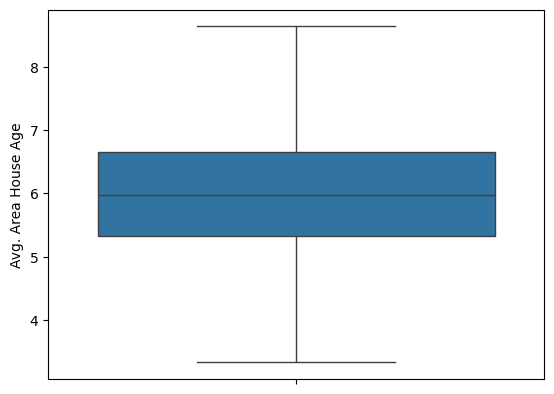

In [30]:
sns.boxplot(df1['Avg. Area House Age'])

<Axes: ylabel='Avg. Area Number of Rooms'>

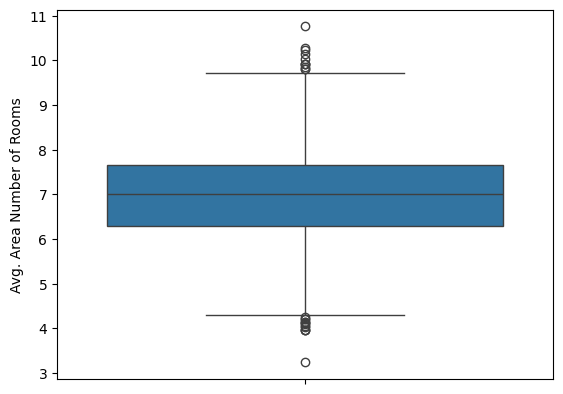

In [16]:
sns.boxplot(df1['Avg. Area Number of Rooms']) 


In [31]:
#  we can handle the outliers by IQR method
Q1 = df1['Avg. Area Number of Rooms'].quantile(0.25)
Q3 = df1['Avg. Area Number of Rooms'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print("Lower Limit:", lower_limit)
print("Upper Limit:", upper_limit)

# Cap outliers (recommended)
df1['Avg. Area Number of Rooms'] = np.where(df1['Avg. Area Number of Rooms'] < lower_limit, lower_limit,
                                  np.where(df1['Avg. Area Number of Rooms'] > upper_limit, upper_limit, df1['Avg. Area Number of Rooms']))


Lower Limit: 4.249318077631152
Upper Limit: 9.715803469578077


<Axes: ylabel='Avg. Area Number of Rooms'>

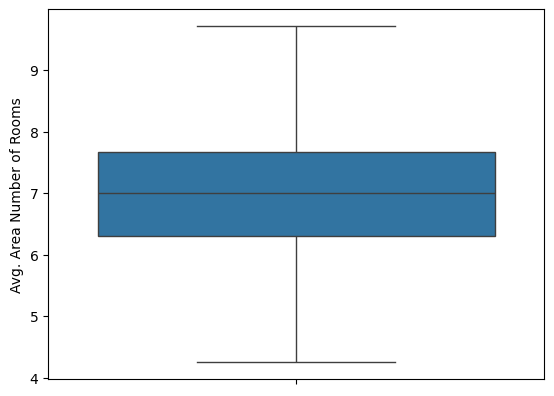

In [32]:
sns.boxplot(df1['Avg. Area Number of Rooms'])

# checks count_values

In [33]:
# checks the counts values of every columns
for col in df1.columns:
    print(f"\nColumn: {col}")
    print(df1[col].value_counts())



Column: Avg. Area Income
Avg. Area Income
40026.397972    19
97237.503083    13
59927.660813     1
81885.927184     1
74522.901804     1
                ..
60567.944140     1
78491.275435     1
63390.686886     1
68001.331235     1
78394.339278     1
Name: count, Length: 4970, dtype: int64

Column: Avg. Area House Age
Avg. Area House Age
3.329495    15
8.643597    10
7.721100     1
5.067890     1
5.865890     1
            ..
7.830362     1
6.999135     1
7.250591     1
5.534388     1
5.071624     1
Name: count, Length: 4977, dtype: int64

Column: Avg. Area Number of Rooms
Avg. Area Number of Rooms
4.249318    13
9.715803    11
7.009188     1
6.730821     1
8.512727     1
            ..
6.137356     1
6.576763     1
4.805081     1
7.130144     1
6.792336     1
Name: count, Length: 4978, dtype: int64

Column: Avg. Area Number of Bedrooms
Avg. Area Number of Bedrooms
4.38    46
3.17    41
3.40    40
3.16    39
3.22    38
        ..
6.17     7
6.01     6
6.02     6
5.42     6
6.42     5


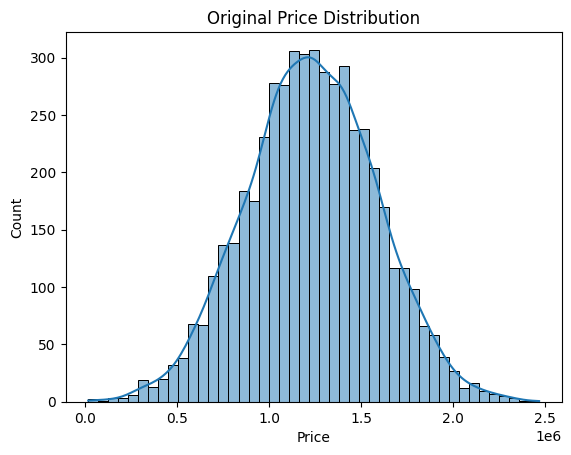

In [34]:
sns.histplot(df['Price'], kde=True)
plt.title('Original Price Distribution')
plt.show()


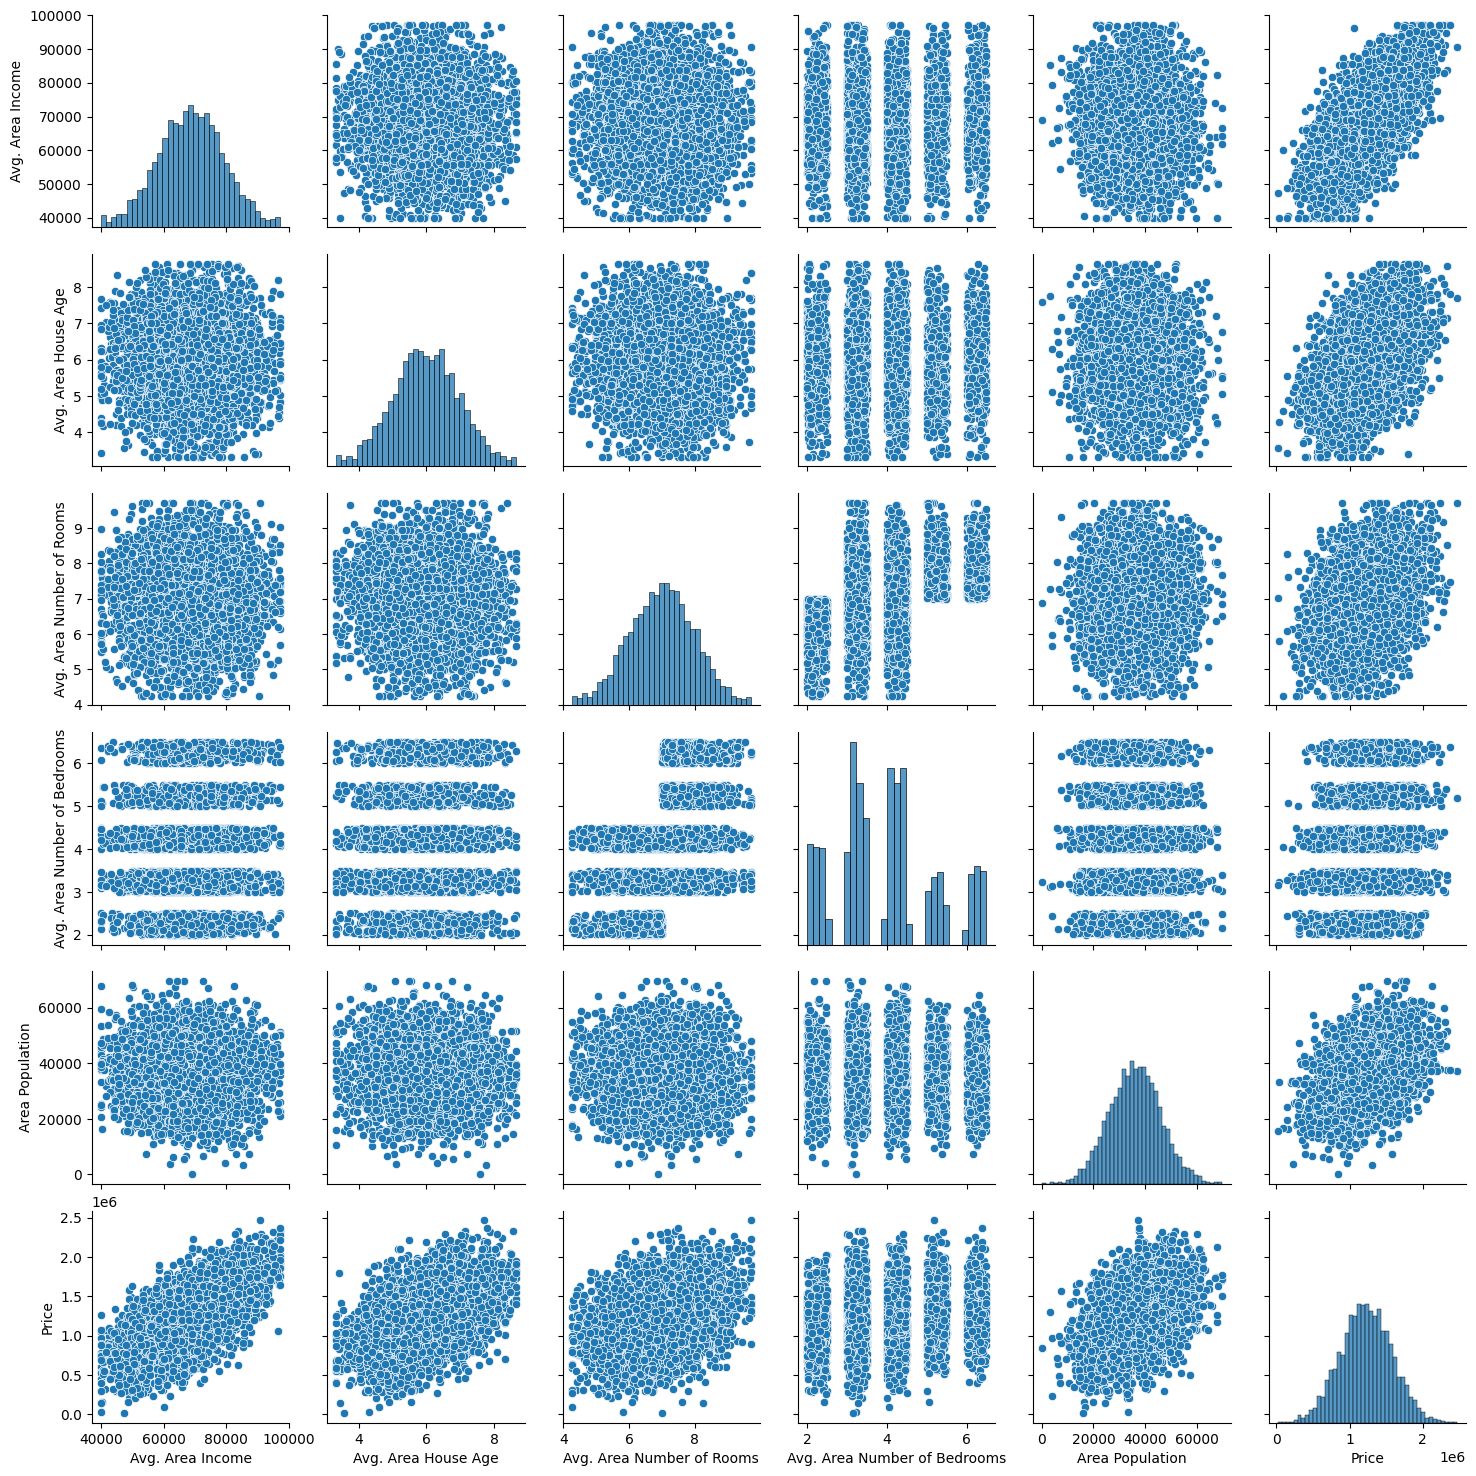

In [35]:
sns.pairplot(df1)


In [36]:
df1.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [37]:
df1['Price']


0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

# Split the data

In [39]:
X=df1.drop(columns='Price')
y=df1['Price']

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(4000, 5)
(1000, 5)


In [42]:
# we apply scalling method 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test) 

In [45]:
from sklearn.linear_model import LassoCV
model=LassoCV()
# Fit the model using log-transformed target
model.fit(X_train_scaled, y_train)

# Predict log prices
y_pred= model.predict(X_test_scaled)
# Calculate RMSE on original scale
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(" MAE :", mean_absolute_error(y_test, y_pred))
print(" MSE :", mean_squared_error(y_test, y_pred))
print(" RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print(" R²  :", r2_score(y_test, y_pred))


 MAE : 80903.50877110579
 MSE : 10185798135.50388
 RMSE: 100924.7151866374
 R²  : 0.9165188733714219


In [56]:
# Dictionary of models
models = {
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "RandomForest": RandomForestRegressor(random_state=42, n_estimators=100),
    "GradientBoosting": GradientBoostingRegressor(random_state=42),
 
}

# Loop through each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print(f"\n📊 {name} Model Performance:")
    print(f"MAE : {mae}")
    print(f"MSE : {mse}")
    print(f"RMSE: {rmse}")
    print(f"R²  : {r2}")



📊 DecisionTree Model Performance:
MAE : 136758.62179787754
MSE : 29213495570.35081
RMSE: 170919.5587706416
R²  : 0.760570993992979

📊 RandomForest Model Performance:
MAE : 93344.26160029936
MSE : 13939075349.995794
RMSE: 118063.8613208792
R²  : 0.885757630487272

📊 GradientBoosting Model Performance:
MAE : 87650.09851862204
MSE : 12017688998.869293
RMSE: 109625.2206331613
R²  : 0.901504997080148


In [255]:
from sklearn.linear_model import LassoCV

In [257]:
model=LassoCV(alphas=np.logspace(-4, 1, 50), cv=10)

In [259]:
model.fit(X_train_scaled,y_train)

LassoCV(alphas=array([1.00000000e-04, 1.26485522e-04, 1.59985872e-04, 2.02358965e-04,
       2.55954792e-04, 3.23745754e-04, 4.09491506e-04, 5.17947468e-04,
       6.55128557e-04, 8.28642773e-04, 1.04811313e-03, 1.32571137e-03,
       1.67683294e-03, 2.12095089e-03, 2.68269580e-03, 3.39322177e-03,
       4.29193426e-03, 5.42867544e-03, 6.86648845e-03, 8.68511374e-03,
       1.09854114e-02, 1.38949549e-0...
       2.81176870e-02, 3.55648031e-02, 4.49843267e-02, 5.68986603e-02,
       7.19685673e-02, 9.10298178e-02, 1.15139540e-01, 1.45634848e-01,
       1.84206997e-01, 2.32995181e-01, 2.94705170e-01, 3.72759372e-01,
       4.71486636e-01, 5.96362332e-01, 7.54312006e-01, 9.54095476e-01,
       1.20679264e+00, 1.52641797e+00, 1.93069773e+00, 2.44205309e+00,
       3.08884360e+00, 3.90693994e+00, 4.94171336e+00, 6.25055193e+00,
       7.90604321e+00, 1.00000000e+01]),
        cv=10)

In [261]:
print("Best Alpha:", model.alpha_)

Best Alpha: 10.0


In [265]:
from sklearn import metrics

In [267]:
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,y_pred))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean absolute error (MAE): 80886.19701724133
Root mean square error (RMSE): 100323.89478892316


In [269]:
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)
# RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Adjusted R-squared (Manually Calculated)
n = X_test.shape[0]  # Number of samples
p = X_test.shape[1]  # Number of features
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Print Metrics
print("R-squared: ", r2)
print("Adjusted R-squared: ", adj_r2)
print("RMSE: ", rmse)

R-squared:  0.9140937750452247
Adjusted R-squared:  0.913661651177243
RMSE:  100323.89478892316
